The purpose of this analysis is to understand how my listening behavior influences my activity levels, and ultimately attempting to create playlists that motivate me to exercise more

In [2]:
# Importing packages 

# Importing relevant packages
import pandas as pd
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from pathlib import Path

import calendar
import datetime

import xml.etree.ElementTree
import io
import seaborn as sb

In [3]:
# Importing data that I want to consider in my analysis
## my listening history: Last.fm
listening = pd.read_csv('/Users/juliacreighton/Downloads/juliacreighton (4).csv',header=None)
listening.columns = ['Artist_Name','Album','Song','Date']


In [4]:


## my step counts: Apple
path = '/Users/juliacreighton/Downloads/apple_health_export/export.xml'
def iter_records(healthdata):
    healthdata_attr = healthdata.attrib
    for rec in healthdata.iterfind('.//Record'):
        rec_dict = healthdata_attr.copy()
        rec_dict.update(healthdata.attrib)
        for k, v in rec.attrib.items():
            if 'date' in k.lower():
                rec_dict[k] = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S %z')
            else:
                rec_dict[k] = v
        yield rec_dict
e = xml.etree.ElementTree.parse(path).getroot()
health_data = pd.DataFrame(list(iter_records(e)))        

In [5]:
# examining datatypes
print(health_data.dtypes)
print('****')
print(listening.dtypes)

creationDate     datetime64[ns, UTC-07:00]
device                              object
endDate          datetime64[ns, UTC-07:00]
locale                              object
sourceName                          object
sourceVersion                       object
startDate        datetime64[ns, UTC-07:00]
type                                object
unit                                object
value                               object
dtype: object
****
Artist_Name    object
Album          object
Song           object
Date           object
dtype: object


In [6]:
# The health data is stored with date time objects, but the listening data isn't I'll change the formatting.
listening['Date'] = pd.to_datetime(listening.Date)
listening.set_index('Date',inplace=True)
listening.index = listening.index.tz_localize('UTC').tz_convert('US/Pacific')

In [7]:
listening.index = listening.index.round('H')

In [8]:
listening.tail()

,Artist_Name,Album,Song
Date,,,
2016-06-09 15:00:00-07:00,Izzy Bizu,Adam & Eve (Remixes),Adam & Eve - Swindle Remix
2016-06-09 15:00:00-07:00,A$AP Rocky,At.Long.Last.A$AP,Everyday
2016-06-09 15:00:00-07:00,Omi,Cheerleader,Cheerleader - Felix Jaehn Remix Radio Edit
2016-06-09 15:00:00-07:00,Glass Animals,ZABA (Deluxe),Hazey
2016-06-09 15:00:00-07:00,Blackbear,deadroses,90210


In [9]:
health_data.dtypes

creationDate     datetime64[ns, UTC-07:00]
device                              object
endDate          datetime64[ns, UTC-07:00]
locale                              object
sourceName                          object
sourceVersion                       object
startDate        datetime64[ns, UTC-07:00]
type                                object
unit                                object
value                               object
dtype: object

In [10]:
health_data['startDate'] = pd.to_datetime(health_data['startDate'])

In [11]:
health_data['startDate'] = pd.DatetimeIndex(health_data['startDate']).tz_convert('US/Pacific')

In [12]:
health_data['Start_Hour']= health_data['startDate'].dt.hour

In [13]:
#health_data.index = pd.DatetimeIndex(health_data['startDate']).tz_convert(None)

In [14]:
#health_data.index.tz_localize(tz='US/Pacific')

In [15]:
#health_data.index.tz_localize('US/Pacific')#.round('H') #.tz_localize('US/Pacific',ambiguous=False)

In [16]:
#health_data.set_index(['startDate'],inplace=True)

In [17]:
#health_data.index = health_data.index.tz_convert('US/Pacific')

In [18]:
#health_data.index = pd.to_datetime(health_data.index)

In [19]:
#listening.index = 
#health_data.index.round('H')

In [20]:
step_data = health_data[health_data.type=='HKQuantityTypeIdentifierStepCount']

In [21]:
step_data['value'].fillna(0,inplace=True)
step_data['value'] = step_data['value'].astype('int')

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
step_data['Date'] = step_data['startDate'].dt.date

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
step_data.head()

,creationDate,device,endDate,locale,sourceName,sourceVersion,startDate,type,unit,value,Start_Hour,Date
1,2014-09-17 17:22:41-07:00,NaN,2014-09-10 16:24:13-07:00,en_US,Health,NaN,2014-09-10 16:24:08-07:00,HKQuantityTypeIdentifierStepCount,count,10,16,2014-09-10
2,2014-09-17 17:22:41-07:00,NaN,2014-09-10 17:31:14-07:00,en_US,Health,NaN,2014-09-10 17:31:09-07:00,HKQuantityTypeIdentifierStepCount,count,14,17,2014-09-10
3,2014-09-17 17:22:41-07:00,NaN,2014-09-10 17:36:35-07:00,en_US,Health,NaN,2014-09-10 17:36:30-07:00,HKQuantityTypeIdentifierStepCount,count,396,17,2014-09-10
4,2014-09-17 17:22:41-07:00,NaN,2014-09-10 17:41:40-07:00,en_US,Health,NaN,2014-09-10 17:41:35-07:00,HKQuantityTypeIdentifierStepCount,count,266,17,2014-09-10
5,2014-09-17 17:22:41-07:00,NaN,2014-09-10 17:47:40-07:00,en_US,Health,NaN,2014-09-10 17:47:35-07:00,HKQuantityTypeIdentifierStepCount,count,291,17,2014-09-10


In [24]:
#step_data.reset_index(inplace=True)
hourly_step_data = step_data.groupby(['Date','Start_Hour'], as_index=False)['value'].sum()

In [25]:
hourly_step_data.rename({'value':'Steps'},axis=1,inplace=True)

In [26]:
#hourly_step_data.set_index(['startDate'],inplace=True)

In [27]:
hourly_step_data.head()

,Date,Start_Hour,Steps
0,2014-09-10,16,10
1,2014-09-10,17,1406
2,2014-09-10,18,122
3,2014-09-10,19,10
4,2014-09-10,20,19


In [28]:
listening['Hour'] = listening.index.hour
listening['Listen_Date'] =listening.index.date

In [29]:
hourly_listening_count = listening.reset_index().groupby(['Listen_Date','Hour'], as_index=False)['Song'].count()

In [30]:
hourly_step_data['Date'] = pd.to_datetime(hourly_step_data['Date'])

In [31]:
hourly_listening_count['Listen_Date'] = pd.to_datetime(hourly_listening_count['Listen_Date'])

In [32]:
listening_steps_hourly = hourly_listening_count.merge(hourly_step_data, left_on=['Listen_Date','Hour'], right_on =['Date','Start_Hour'],how ='outer')


In [33]:
listening_steps_hourly.tail()

,Listen_Date,Hour,Song,Date,Start_Hour,Steps
15063,NaT,NaN,NaN,2018-06-09,22.0,168.0
15064,NaT,NaN,NaN,2018-06-10,8.0,396.0
15065,NaT,NaN,NaN,2018-06-10,9.0,438.0
15066,NaT,NaN,NaN,2018-06-10,11.0,16.0
15067,NaT,NaN,NaN,2018-06-10,15.0,157.0


In [34]:
listening_steps_hourly.Date = listening_steps_hourly.Date.combine_first(listening_steps_hourly['Listen_Date'])
listening_steps_hourly.Hour = listening_steps_hourly.Hour.combine_first(listening_steps_hourly['Start_Hour'])

In [35]:
listening_steps_hourly['Steps_Missing'] = pd.isna(listening_steps_hourly['Steps'])
listening_steps_hourly['Listening_Missing'] = pd.isna(listening_steps_hourly['Song'])

In [36]:
listening_steps_hourly.drop(['Listen_Date','Start_Hour'],axis=1,inplace=True)

In [37]:
listening_steps_hourly.set_index('Date',inplace=True)

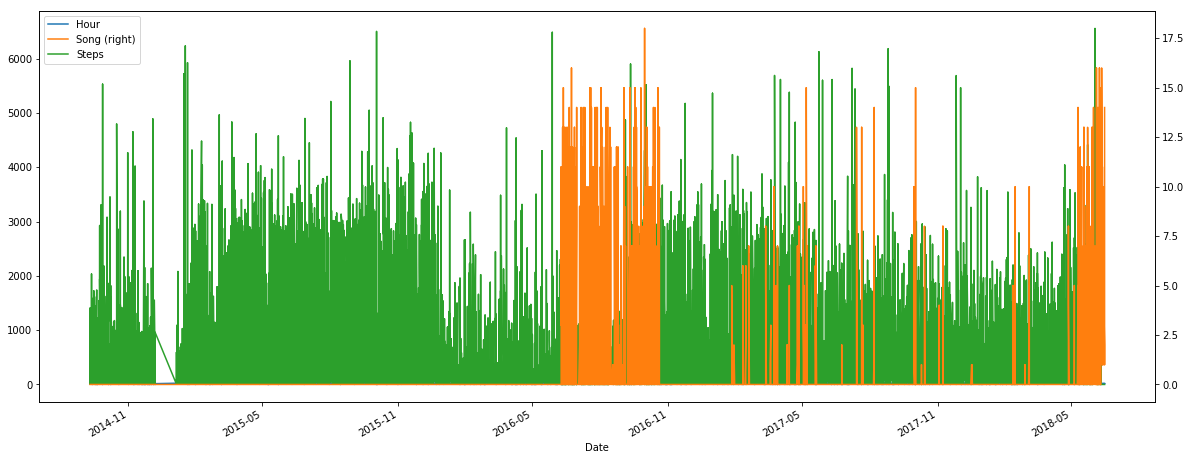

In [38]:
listening_steps_hourly.fillna(0).plot(secondary_y='Song',figsize=(20,8))

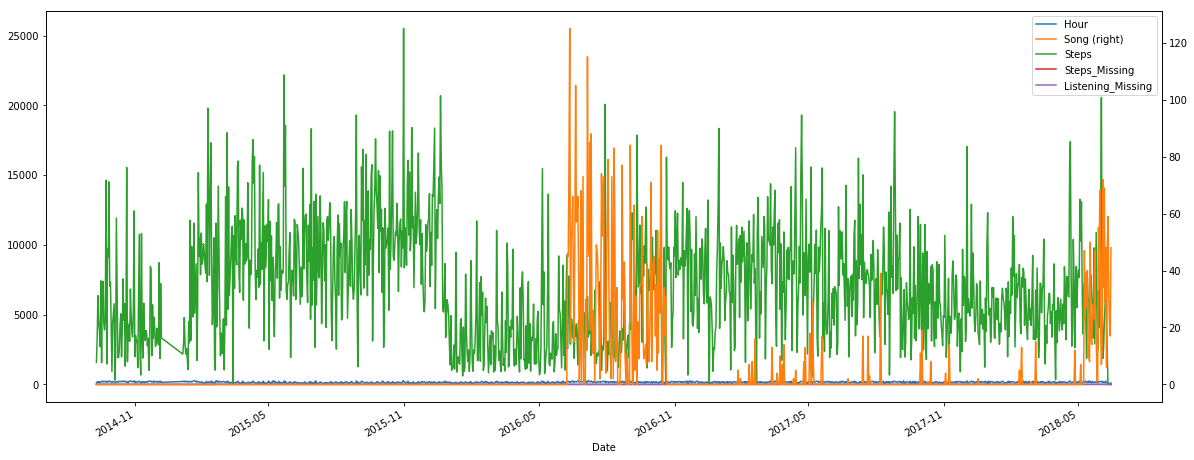

In [39]:
#.loc['2018-5-01':'2018-6-10']
listening_steps_hourly.fillna(0).groupby(listening_steps_hourly.index).sum().plot(secondary_y='Song',figsize=(20,8))

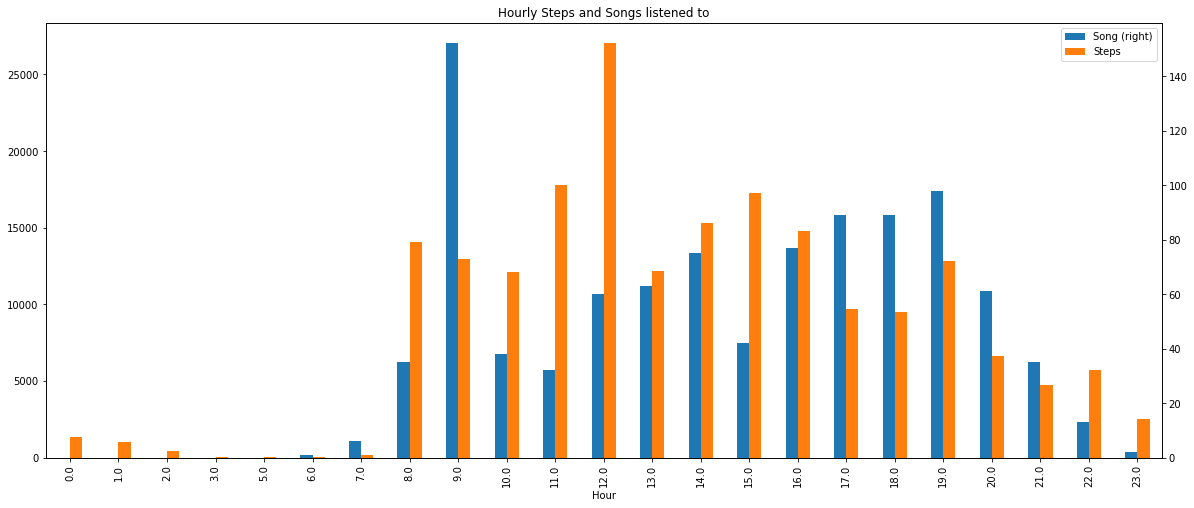

In [40]:
listening_steps_hourly.loc['2018-5-10':'2018-6-10'].fillna(0).groupby(['Hour'])['Song',\
                                                   'Steps'].sum().plot(kind='bar',secondary_y='Song',figsize=(20,8), title='Hourly Steps and Songs listened to')

In [41]:
wday = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'    
}

In [42]:

listening_steps_hourly['Day_Of_Week'] = listening_steps_hourly.index.weekday

In [43]:
#listening_steps_hourly.loc['2017-5-1':'2018-6-10']
listening_steps_hourly.Day_Of_Week = listening_steps_hourly.Day_Of_Week.map(wday)

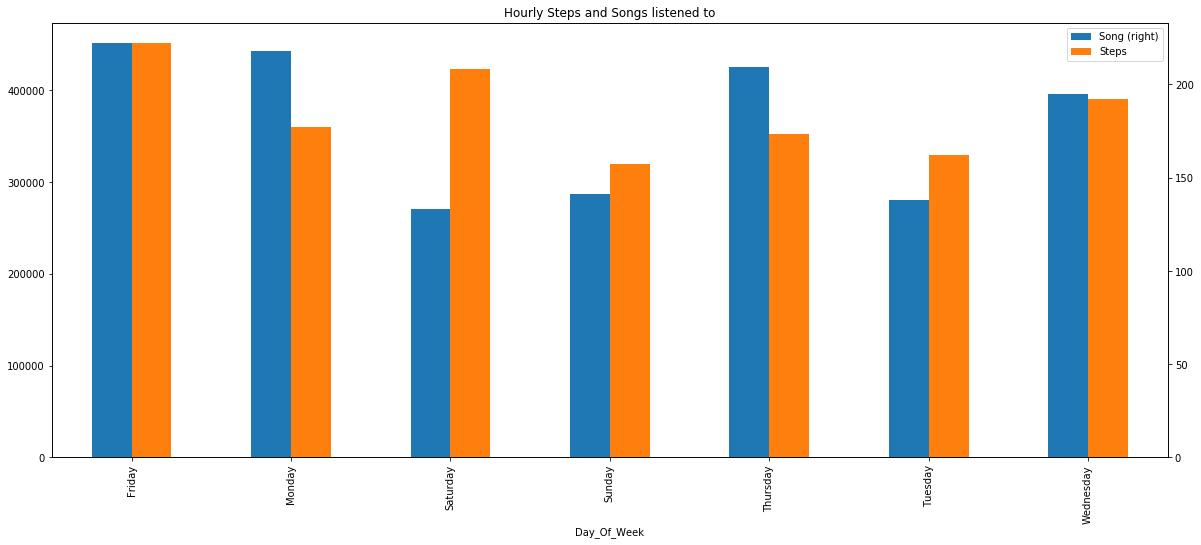

In [44]:
listening_steps_hourly.loc['2017-5-1':'2018-6-10'].fillna(0).sort_index().groupby(['Day_Of_Week'])['Song',\
                                                   'Steps'].sum().plot(kind='bar',secondary_y='Song',figsize=(20,8), title='Hourly Steps and Songs listened to')

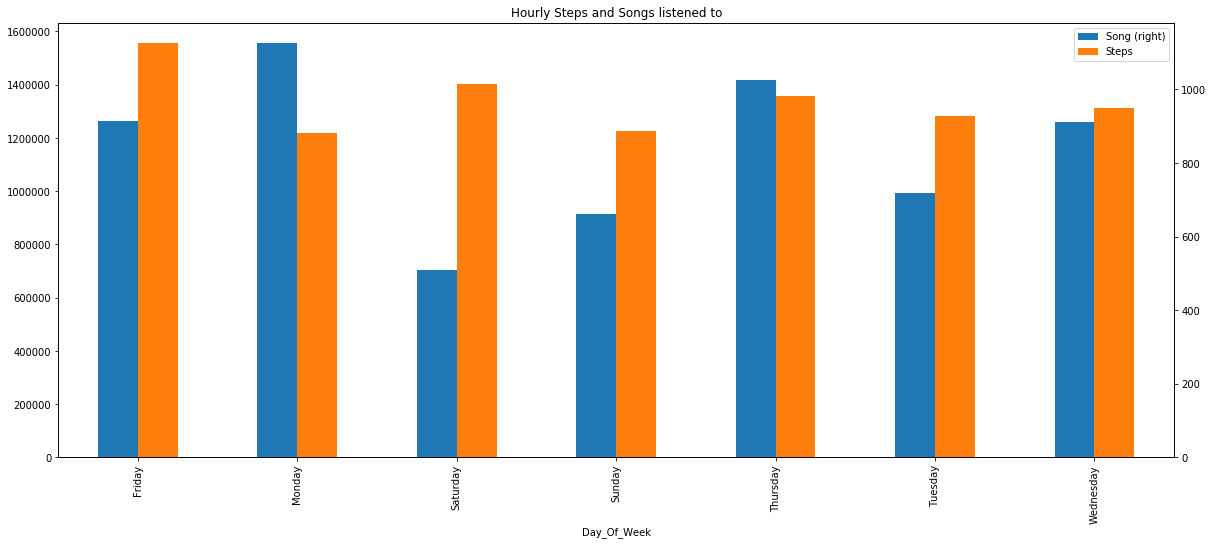

In [45]:
listening_steps_hourly.fillna(0).sort_index().groupby(['Day_Of_Week'])['Song',\
                                                   'Steps'].sum().plot(kind='bar',secondary_y='Song',figsize=(20,8), title='Hourly Steps and Songs listened to')

In [46]:
listening_steps_hourly = pd.get_dummies(listening_steps_hourly, columns=['Steps_Missing','Listening_Missing'],drop_first=True)
#listening_steps_hourly

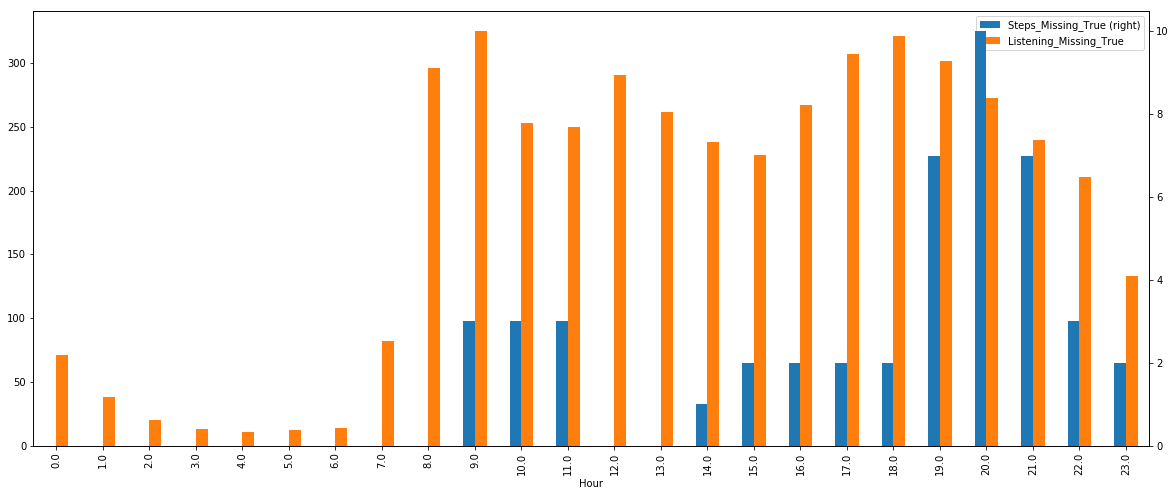

In [47]:
listening_steps_hourly.loc['2017-5-1':'2018-6-10'].groupby(['Hour'])['Steps_Missing_True','Listening_Missing_True'].sum().plot(kind='bar',secondary_y='Steps_Missing_True',figsize=(20,8))

In [48]:
listening_steps_hourly['Date'] = listening_steps_hourly.index.date
listening_steps_hourly['Month'] = listening_steps_hourly.index.month
listening_steps_hourly['Year'] = listening_steps_hourly.index.year

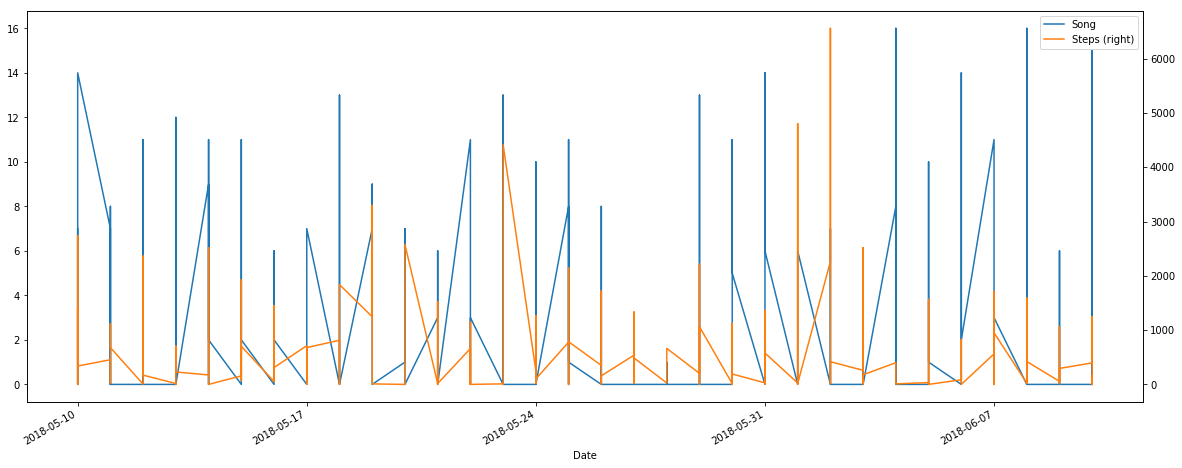

In [49]:
listening_steps_hourly.loc['2018-5-10':'2018-6-10'][['Song','Steps']].fillna(0).plot(kind='line',secondary_y='Steps',figsize=(20,8))

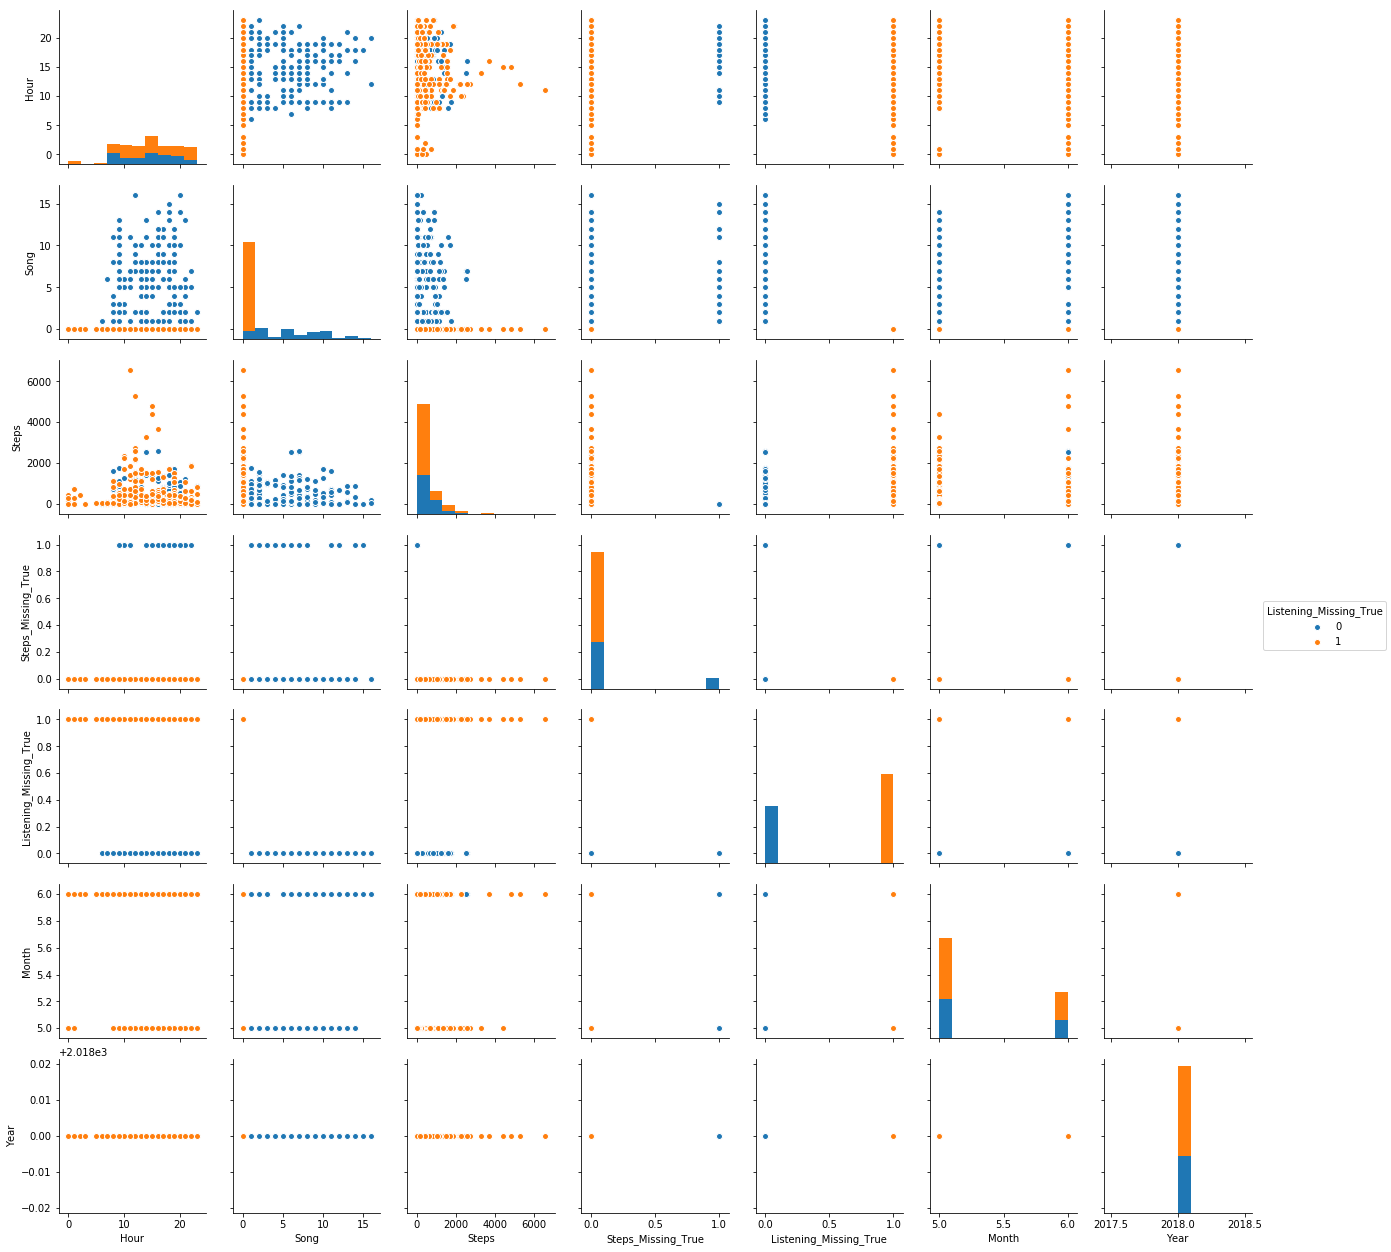

In [171]:
sb.pairplot(listening_steps_hourly.loc['2018-5-10':'2018-6-10'].fillna(0),hue='Listening_Missing_True')

In [50]:
listening.reset_index(inplace=True)

In [51]:
listening['Listen_Date'] = pd.to_datetime(listening['Listen_Date'])
hourly_step_data['Date'] = pd.to_datetime(hourly_step_data['Date'])

In [57]:
listening.head()

,Date,Artist_Name,Album,Song,Hour,Listen_Date
0,2018-06-15 17:00:00-07:00,Toro y Moi,What For?,Buffalo,17,2018-06-15
1,2018-06-15 17:00:00-07:00,BlocBoy JB,Look Alive (feat. Drake),Look Alive (feat. Drake),17,2018-06-15
2,2018-06-15 16:00:00-07:00,The Dandy Warhols,Welcome to the Monkey House,We Used to Be Friends,16,2018-06-15
3,2018-06-15 16:00:00-07:00,Kai Straw,Toothpick,Friction,16,2018-06-15
4,2018-06-15 16:00:00-07:00,Young Thug,Jeffery,Pick Up The Phone,16,2018-06-15


In [100]:

song_level_listening_steps = hourly_step_data.merge(listening.drop(['Date'],axis=1),left_on=['Date','Start_Hour'],right_on = ['Listen_Date','Hour'],how='outer')


In [101]:
song_level_listening_steps.dtypes

Date           datetime64[ns]
Start_Hour            float64
Steps                 float64
Artist_Name            object
Album                  object
Song                   object
Hour                  float64
Listen_Date    datetime64[ns]
dtype: object

In [102]:
song_level_listening_steps.loc[~(pd.isna(song_level_listening_steps.Listen_Date))]

,Date,Start_Hour,Steps,Artist_Name,Album,Song,Hour,Listen_Date
6608,2016-06-09,18.0,191.0,Penguin Prison,Lost In New York,Show Me The Way,18.0,2016-06-09
6609,2016-06-09,18.0,191.0,Drake,Views,FeEL no WAyS,18.0,2016-06-09
6610,2016-06-09,19.0,492.0,All We Are,All We Are,I Wear You,19.0,2016-06-09
6611,2016-06-09,19.0,492.0,Ty Dolla $ign,Free TC,Blasé (Feat. Future & Rae Sremmurd),19.0,2016-06-09
6612,2016-06-09,19.0,492.0,MOOD ROBOT,The Story We Tell Ourselves,Drip,19.0,2016-06-09
6613,2016-06-09,19.0,492.0,SG Lewis,Warm,Warm,19.0,2016-06-09
6614,2016-06-09,19.0,492.0,Toro y Moi,What For?,Buffalo,19.0,2016-06-09
6615,2016-06-09,20.0,107.0,Drake,Views,Controlla,20.0,2016-06-09
6616,2016-06-09,20.0,107.0,Drake,Views,U WIth Me?,20.0,2016-06-09
6617,2016-06-09,20.0,107.0,All We Are,All We Are,I Wear You,20.0,2016-06-09


In [103]:
song_level_listening_steps['Date'] = song_level_listening_steps.Date.fillna(song_level_listening_steps.Listen_Date)
song_level_listening_steps['Hour'] = song_level_listening_steps.Hour.fillna(song_level_listening_steps.Start_Hour)

In [104]:
song_level_listening_steps.head()

,Date,Start_Hour,Steps,Artist_Name,Album,Song,Hour,Listen_Date
0,2014-09-10,16.0,10.0,NaN,NaN,NaN,16.0,NaT
1,2014-09-10,17.0,1406.0,NaN,NaN,NaN,17.0,NaT
2,2014-09-10,18.0,122.0,NaN,NaN,NaN,18.0,NaT
3,2014-09-10,19.0,10.0,NaN,NaN,NaN,19.0,NaT
4,2014-09-10,20.0,19.0,NaN,NaN,NaN,20.0,NaT


In [105]:
song_level_listening_steps.drop(['Listen_Date'],axis=1,inplace=True)
song_level_listening_steps.set_index('Date',inplace=True)

In [106]:
song_level_listening_steps.sort_index(inplace=True)

In [214]:
recent_listening = song_level_listening_steps.loc['2018-5-10':'2018-6-10']

In [215]:
recent_listening['Above_Avg_Steps'] = np.where(recent_listening['Steps']/recent_listening['Steps'].mean() >=1,1,0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [216]:
recent_listening[['Above_Avg_Steps','Artist_Name']].drop_duplicates().groupby('Above_Avg_Steps').count()

,Artist_Name
Above_Avg_Steps,
0,203
1,139


In [217]:
recent_listening.head()

,Start_Hour,Steps,Artist_Name,Album,Song,Hour,Above_Avg_Steps
Date,,,,,,,
2018-05-10,16.0,1.0,Rich The Kid,The World is Yours,Plug Walk,16.0,0
2018-05-10,15.0,47.0,Migos,MotorSport,MotorSport,15.0,0
2018-05-10,15.0,47.0,Sundara Karma,Flame (Roosevelt Remix),Flame (Roosevelt Remix),15.0,0
2018-05-10,15.0,47.0,Tom Misch,Beat Tape 2,Beautiful Escape,15.0,0
2018-05-10,14.0,1405.0,French Montana,Jungle Rules,unforgettable,14.0,1


In [219]:
#recent_listening.set_index('Date').loc['2018-5-10':'2018-5-10']

In [221]:
#pd.DataFrame(recent_listening.fillna(0).groupby(by=[recent_listening.index,'Song'])['Steps'].count()).merge(recent_listening)
recent_listening = pd.DataFrame(recent_listening.reset_index().fillna(0).groupby(by=['Date','Start_Hour'
                                                    ])['Steps'].count()).rename({'Steps':'Listens_Per_Hour'},axis=1).merge(recent_listening.reset_index(),
                                                                                                                          left_on=['Date','Start_Hour'],right_on=['Date','Start_Hour'])


In [222]:
recent_listening

,Date,Start_Hour,Listens_Per_Hour,Steps,Artist_Name,Album,Song,Hour,Above_Avg_Steps
0,2018-05-10,8.0,1,876.0,NaN,NaN,NaN,8.0,1
1,2018-05-10,9.0,1,985.0,NaN,NaN,NaN,9.0,1
2,2018-05-10,11.0,1,547.0,NaN,NaN,NaN,11.0,1
3,2018-05-10,12.0,1,2739.0,NaN,NaN,NaN,12.0,1
4,2018-05-10,13.0,1,92.0,NaN,NaN,NaN,13.0,0
5,2018-05-10,14.0,7,1405.0,French Montana,Jungle Rules,unforgettable,14.0,1
6,2018-05-10,14.0,7,1405.0,Migos,Culture II,Stir Fry,14.0,1
7,2018-05-10,14.0,7,1405.0,The Chainsmokers,Don't Let Me Down,Don't Let Me Down,14.0,1
8,2018-05-10,14.0,7,1405.0,Drake,Scary Hours,God's Plan,14.0,1
9,2018-05-10,14.0,7,1405.0,LCD Soundsystem,This Is Happening,Dance Yrself Clean,14.0,1


In [223]:
recent_listening.set_index('Date',inplace=True)

In [224]:
recent_listening.Listens_Per_Hour.value_counts(normalize=True)

1     0.245794
11    0.123364
8     0.097196
10    0.084112
6     0.067290
7     0.065421
5     0.065421
13    0.060748
9     0.050467
16    0.029907
2     0.028972
14    0.026168
12    0.022430
4     0.018692
3     0.014019
Name: Listens_Per_Hour, dtype: float64

In [225]:
recent_listening.head()

,Start_Hour,Listens_Per_Hour,Steps,Artist_Name,Album,Song,Hour,Above_Avg_Steps
Date,,,,,,,,
2018-05-10,8.0,1,876.0,NaN,NaN,NaN,8.0,1
2018-05-10,9.0,1,985.0,NaN,NaN,NaN,9.0,1
2018-05-10,11.0,1,547.0,NaN,NaN,NaN,11.0,1
2018-05-10,12.0,1,2739.0,NaN,NaN,NaN,12.0,1
2018-05-10,13.0,1,92.0,NaN,NaN,NaN,13.0,0


In [226]:
#pd.DataFrame(recent_listening.fillna(0).groupby(by=[recent_listening.index,'Song'])['Steps'].count()).merge(recent_listening)
recent_listening = pd.DataFrame(recent_listening.fillna(0).groupby(by=[recent_listening.index,'Start_Hour'])['Artist_Name'].nunique()).rename({'Artist_Name':'Artists_Per_Hour'},axis=1).reset_index().merge(recent_listening.reset_index(),
                                                                                                                          left_on=['Date','Start_Hour'],right_on=['Date','Start_Hour'])



In [227]:
recent_listening.Artists_Per_Hour.value_counts(normalize=True)

1     0.273832
6     0.128972
8     0.089720
5     0.073832
2     0.061682
10    0.060748
13    0.053271
3     0.051402
9     0.049533
11    0.042991
7     0.041121
12    0.039252
4     0.033645
Name: Artists_Per_Hour, dtype: float64

In [228]:
recent_listening.set_index('Date',inplace=True)

In [229]:
#recent_listening['Hour'] = recent_listening.index.hour

In [230]:
recent_listening

,Start_Hour,Artists_Per_Hour,Listens_Per_Hour,Steps,Artist_Name,Album,Song,Hour,Above_Avg_Steps
Date,,,,,,,,,
2018-05-10,8.0,1,1,876.0,NaN,NaN,NaN,8.0,1
2018-05-10,9.0,1,1,985.0,NaN,NaN,NaN,9.0,1
2018-05-10,11.0,1,1,547.0,NaN,NaN,NaN,11.0,1
2018-05-10,12.0,1,1,2739.0,NaN,NaN,NaN,12.0,1
2018-05-10,13.0,1,1,92.0,NaN,NaN,NaN,13.0,0
2018-05-10,14.0,7,7,1405.0,French Montana,Jungle Rules,unforgettable,14.0,1
2018-05-10,14.0,7,7,1405.0,Migos,Culture II,Stir Fry,14.0,1
2018-05-10,14.0,7,7,1405.0,The Chainsmokers,Don't Let Me Down,Don't Let Me Down,14.0,1
2018-05-10,14.0,7,7,1405.0,Drake,Scary Hours,God's Plan,14.0,1


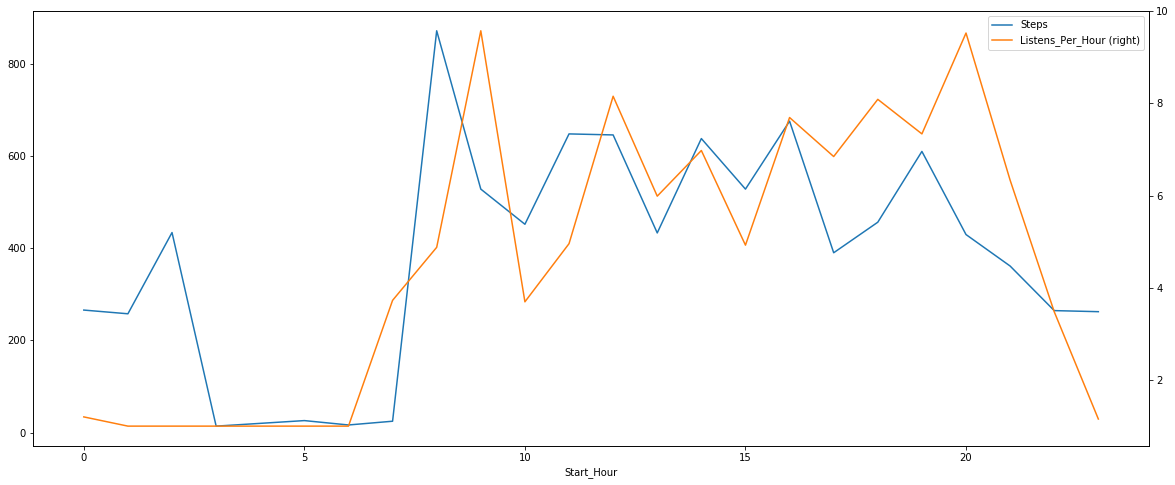

In [231]:
recent_listening[['Steps','Listens_Per_Hour','Start_Hour']].fillna(0).groupby(['Start_Hour']).mean().plot(kind='line',secondary_y='Listens_Per_Hour',figsize=(20,8))

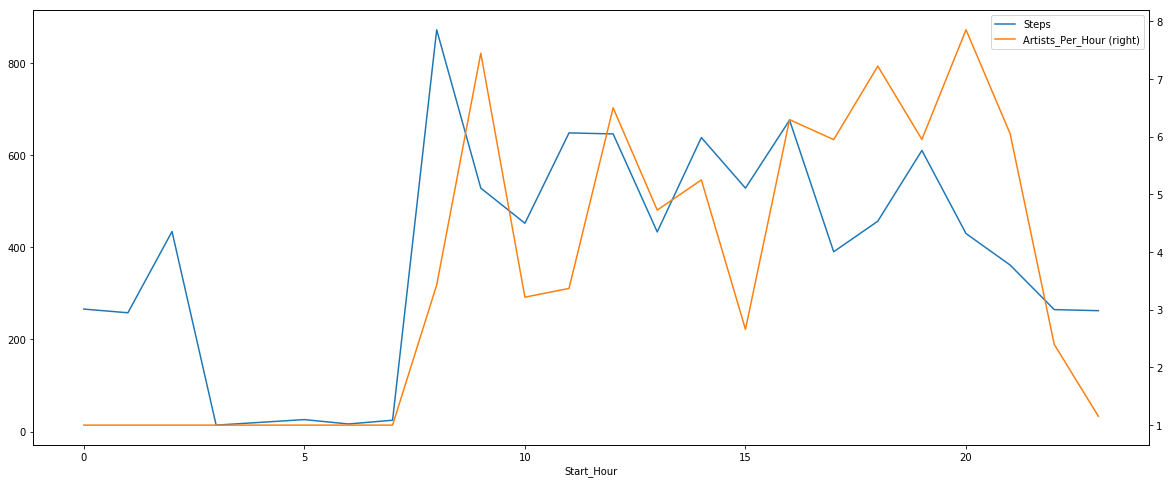

In [232]:
recent_listening[['Steps','Artists_Per_Hour','Start_Hour']].fillna(0).groupby(['Start_Hour']).mean().plot(kind='line',secondary_y='Artists_Per_Hour',figsize=(20,8))

In [233]:
recent_listening.head()

,Start_Hour,Artists_Per_Hour,Listens_Per_Hour,Steps,Artist_Name,Album,Song,Hour,Above_Avg_Steps
Date,,,,,,,,,
2018-05-10,8.0,1,1,876.0,NaN,NaN,NaN,8.0,1
2018-05-10,9.0,1,1,985.0,NaN,NaN,NaN,9.0,1
2018-05-10,11.0,1,1,547.0,NaN,NaN,NaN,11.0,1
2018-05-10,12.0,1,1,2739.0,NaN,NaN,NaN,12.0,1
2018-05-10,13.0,1,1,92.0,NaN,NaN,NaN,13.0,0


In [234]:
import spotipy
import spotipy.oauth2 as oauth2
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [129]:
# Connecting to the Spotify API
credentials = oauth2.SpotifyClientCredentials(
    client_id=Path('/Users/juliacreighton/Desktop/key.txt').read_text(), 
    client_secret=Path('/Users/juliacreighton/Desktop/secret.txt').read_text())

token = credentials.get_access_token()
sp = spotipy.Spotify(auth=token)


In [130]:
artists = listening[['Artist_Name']].drop_duplicates()
artists['Spotify_ID']= ''
artists['Spotify_Genre']= ''
artist_names = artists.values.tolist()

In [140]:
for i in (artist_names):
        artist_name = i[0]
        
        result = sp.search(artist_name,limit=1,type='artist')
        
        if not (result['artists']['items']):
            i[1] = 'Unknown'
            i[2] = 'Unknown'
            
        else:
            art_id = result['artists']['items'][0]['id']
            art_genres = result['artists']['items'][0]['genres']
            i[1] = art_id
            i[2] = art_genres
  

retrying ...1secs


In [145]:
final = []
for row in artist_names:
        for genre in row[2]:
            final.append([row[0],row[1], genre])

artists = pd.DataFrame(final,columns=['Artist_Name','Spotify_ID','Spotify_Genre'])

,Artist_Name,Spotify_ID,Spotify_Genre
0,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,alternative dance
1,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,art pop
2,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,chillwave
3,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,freak folk
4,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,indie pop
5,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,indie r&b
6,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,indietronica
7,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,neo-psychedelic
8,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,new rave
9,Toro y Moi,6O4EGCCb6DoIiR6B1QCQgp,nu gaze


In [148]:
print(artists.shape)
print(artists[artists.Spotify_ID!='Unknown'].shape)

(3502, 3)
(3460, 3)


In [149]:
artists = artists.drop_duplicates()

In [150]:
artists = artists[artists.Spotify_ID!='Unknown']

In [151]:
artist_dummies = pd.get_dummies(artists, columns=['Spotify_Genre'])

In [152]:
artist_dummies = artist_dummies.groupby(by=['Artist_Name','Spotify_ID'],as_index=False).sum()

In [155]:
ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(artist_dummies.drop(['Artist_Name','Spotify_ID'],axis=1))
label = ward.labels_
artist_dummies['ward_hier'] =ward.labels_

In [156]:
my_listening_labelled = artists.merge(artist_dummies[['Artist_Name','ward_hier']],on ='Artist_Name')

my_listening_labelled = my_listening_labelled.groupby(['ward_hier','Spotify_Genre'],as_index=False).count()
my_listening_labelled.sort_values(by=['ward_hier','Spotify_ID'],ascending=False,inplace=True)
my_listening_labelled =  my_listening_labelled.merge(my_listening_labelled[['ward_hier','Spotify_Genre','Artist_Name']],on = 'ward_hier')


my_listening_labelled = my_listening_labelled[my_listening_labelled['Spotify_Genre_x']!= my_listening_labelled['Spotify_Genre_y']]
my_listening_labelled['Genre'] = my_listening_labelled['Spotify_Genre_x'] + '/' + my_listening_labelled['Spotify_Genre_y']
my_listening_labelled['Artist_Name_Total'] = my_listening_labelled['Artist_Name_x'] + my_listening_labelled['Artist_Name_y']
my_listening_labelled= my_listening_labelled[['ward_hier','Genre','Artist_Name_Total']]
my_listening_labelled.sort_values(by=['ward_hier','Artist_Name_Total'],ascending=False,inplace=True)
my_listening_labelled = my_listening_labelled[my_listening_labelled.index % 2 != 0]
my_listening_labelled['Rank'] = my_listening_labelled.sort_values(['ward_hier','Artist_Name_Total'], ascending=[True,False]).groupby(['ward_hier']).cumcount() + 1
my_listening_labelled = my_listening_labelled[my_listening_labelled.Rank==1]





In [235]:
labeled = artist_dummies[['Artist_Name','Spotify_ID','ward_hier']].merge(recent_listening.reset_index(), on = 'Artist_Name')

In [236]:
labeled = labeled.merge(my_listening_labelled[['ward_hier','Genre']], on =['ward_hier'])

In [237]:
labeled.set_index('Date',inplace=True)

In [238]:
genre_counts = labeled.reset_index().groupby(['Date', 'Start_Hour','Listens_Per_Hour','Artists_Per_Hour','Steps','Genre'],as_index=False)['Song'].count()

In [239]:
genre_counts = genre_counts.pivot_table(index=['Date','Start_Hour','Listens_Per_Hour','Artists_Per_Hour','Steps'],columns=['Genre'],values='Song')

In [240]:
genre_counts.reset_index(inplace=True)

In [241]:
genre_counts.fillna(0, inplace=True)

In [243]:
genre_counts.set_index(['Date'],inplace=True)

In [244]:
genre_counts.groupby(['Start_Hour'])['Steps','chillwave/neo-psychedelic','dance pop/pop',
                                     'indie folk/folk-pop','indietronica/alternative dance','modern rock/indie pop',
                                     'pop rock/post-grunge','pop/indie r&b','rap/hip hop',
                                     'rap/trap music','rock/classic rock'].s




Genre,Start_Hour,Listens_Per_Hour,Artists_Per_Hour,Steps,chillwave/neo-psychedelic,dance pop/pop,indie folk/folk-pop,indietronica/alternative dance,modern rock/indie pop,pop rock/post-grunge,pop/indie r&b,rap/hip hop,rap/trap music,rock/classic rock
Date,,,,,,,,,,,,,,
2018-05-10,14.0,7,7,1405.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0
2018-05-10,15.0,4,4,47.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
2018-05-10,16.0,5,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0
2018-05-10,18.0,14,13,338.0,2.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,2.0,0.0
2018-05-10,20.0,1,1,238.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-11,9.0,7,7,454.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0
2018-05-11,13.0,6,1,64.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-11,17.0,8,6,837.0,4.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2018-05-11,18.0,1,1,195.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
